# Trabajo Practico 2 - Matrices de Insumo Producto

## Enunciado

### Consigna 1 -

### Consigna 2 -


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from funcionesTP1 import *

In [51]:
#Definimos las matrices:

data1 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
    ]

A1 = np.array(data1)

data2 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
    ]

A2 = np.array(data2)

In [52]:
#Definimos función para calcular los vectores:

def vector_generator(A, n):
    v = np.zeros(n)
    
    for i in range (n):
        A_elev = elevar_matriz(A, i+1 )
        v[i] = np.linalg.norm(A_elev, 2)
    
    return v

def elevar_matriz (A, n):
    res = np.eye(np.shape(A)[0])

    for i in range (n):
        res = res @ A

    return res 

In [53]:
#Generamos los vectores pedidos:
a1 = vector_generator(A1,250)

a2 = vector_generator(A2, 250)

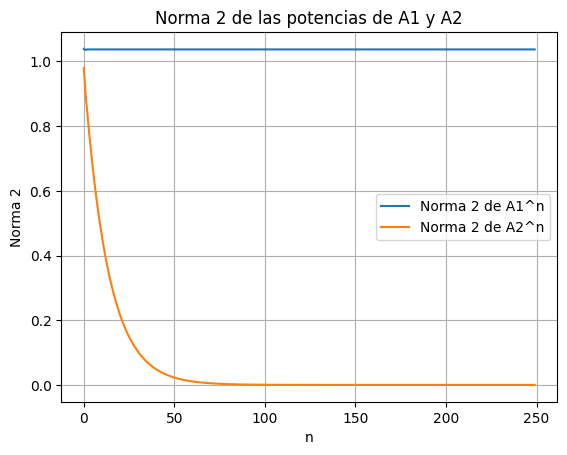

In [54]:
#Grafico:

plt.figure()
plt.plot(a1, label='Norma 2 de A1^n')
plt.plot(a2, label='Norma 2 de A2^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

### Consigna 3 -

In [55]:
#Primero definimos una función que realice el método de la potencia aplicando el método de Monte Carlo.

def metodo_potencia_MonteC(A,n):
    autovals_arr = np.zeros(n)

    for i in range (n):
        autovals_arr[i] = metodo_potencia(A)

    media = np.mean(autovals_arr)
    desvio_estandar = np.std(autovals_arr)

    return media, desvio_estandar

In [56]:
#Calculo Autovalores de A1 y A2

#A1:
a1, ds1 = metodo_potencia_MonteC(A1,250)
print(f'autovalor más grande de A1 :{a1}')


#A2
a2, ds2 = metodo_potencia_MonteC(A2,250)
print(f'autovalor más grande de A12 :{a2}')

#chequeo
#np.linalg.eigvals(A1)
#np.linalg.eigvals(A2)

autovalor más grande de A1 :0.9999995734490685
autovalor más grande de A12 :0.9276512993215253


### Consigna 4 -


In [57]:
#Utilizamos nuevamente las matrices del ejercicio 2:

data1 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
    ]

A1 = np.array(data1)

data2 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
    ]

A2 = np.array(data2)



La ecuacion (4) es : (I − A)^−1 = I + A + A^2 + A^3 + . . . + A^n + . . . (despues lo escribo bien con latex)

In [67]:
#para n = 10
n10 = 10

def serie_de_potencias(A,n): #tal vez ineficiente, pero no me importa juaaaaaaa
    dim=np.shape(A)[0]
    
    v = np.zeros(n)
    e=np.zeros(n)

    L,U,P= calcularLU(np.eye(dim)-A)

    ImenosA_inversa=inversaLU(L, U, P)


    for i in range(n):
        serie= suma_potencias(A,i)
        v[i]=np.linalg.norm(serie, 2)
        e[i]=np.linalg.norm(serie-ImenosA_inversa,2)
    
    
    
    



    return v, e

    
    
def suma_potencias(A,n):
    dim=np.shape(A)[0]
    
    v = np.zeros(n+1)
    I = np.eye(dim)

    if n!=0:
        return elevar_matriz(A,n) + suma_potencias(A,n-1)
    else:
        return I


vA1,errorvA1=serie_de_potencias(A1,n10)

vA2,errorvA2=serie_de_potencias(A2,n10)

vA1_100,errorvA1_100=serie_de_potencias(A1,100)

vA2_100,errorvA2_100=serie_de_potencias(A2,100)

print(errorvA2_100)



[1.34399305e+01 1.24691513e+01 1.15735660e+01 1.07353499e+01
 9.95916790e+00 9.23844824e+00 8.57011312e+00 7.95005303e+00
 7.37488549e+00 6.84132023e+00 6.34636163e+00 5.88721118e+00
 5.46128011e+00 5.06616435e+00 4.69963471e+00 4.35962293e+00
 4.04421052e+00 3.75161774e+00 3.48019363e+00 3.22840666e+00
 2.99483611e+00 2.77816405e+00 2.57716790e+00 2.39071353e+00
 2.21774887e+00 2.05729795e+00 1.90845542e+00 1.77038143e+00
 1.64229690e+00 1.52347909e+00 1.41325758e+00 1.31101044e+00
 1.21616074e+00 1.12817327e+00 1.04655156e+00 9.70835072e-01
 9.00596560e-01 8.35439702e-01 7.74996849e-01 7.18926948e-01
 6.66913624e-01 6.18663389e-01 5.73903988e-01 5.32382865e-01
 4.93865735e-01 4.58135264e-01 4.24989840e-01 3.94242441e-01
 3.65719571e-01 3.39260289e-01 3.14715298e-01 2.91946102e-01
 2.70824224e-01 2.51230483e-01 2.33054321e-01 2.16193178e-01
 2.00551915e-01 1.86042274e-01 1.72582385e-01 1.60096299e-01
 1.48513563e-01 1.37768822e-01 1.27801447e-01 1.18555197e-01
 1.09977900e-01 1.020211

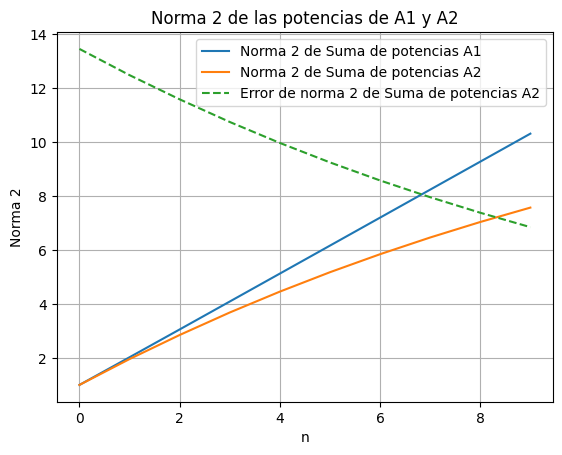

In [70]:
#Grafico para n=10:

plt.figure()
plt.plot(vA1, label='Norma 2 de Suma de potencias A1')
plt.plot(vA2, label='Norma 2 de Suma de potencias A2')
plt.plot(errorvA2, label='Error de norma 2 de Suma de potencias A2',linestyle="--")
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

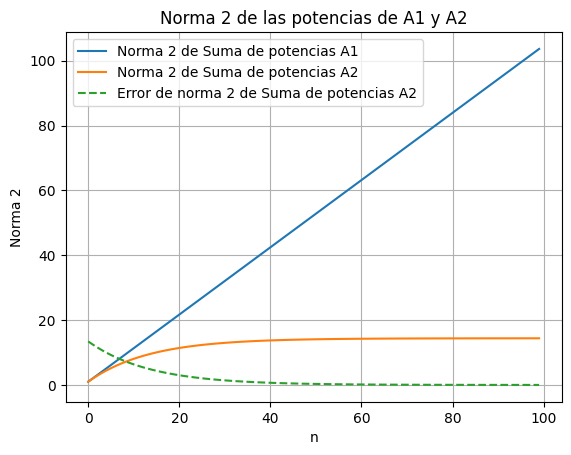

In [71]:
#Grafico para n=100:

plt.figure()
plt.plot(vA1_100, label='Norma 2 de Suma de potencias A1')
plt.plot(vA2_100, label='Norma 2 de Suma de potencias A2')
plt.plot(errorvA2_100, label='Error de norma 2 de Suma de potencias A2',linestyle="--")
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

(b) Podemos obvservar que, mientras que A2 luce converger alrededor del 17, la serie de potencias de A1 diverge. Aumentar el n solo hace que aumente la norma. (c) Con los datos que tenemos, pareciese que la convergencia de la serie de potencias esta relacionado con que la matriz elevada a la n (su norma) tienda a 0 cuando n tiende a infiinito.
